In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def load_data():
    from sklearn.model_selection import train_test_split
    from sklearn import datasets
    
    iris = datasets.load_iris()
    
    train_set_x, test_set_x, train_set_y, test_set_y = train_test_split(iris.data, iris.target, test_size=0.33, random_state=42)
    
    return train_set_x, test_set_x, train_set_y, test_set_y, iris

train_set_x, test_set_x, train_set_y, test_set_y, visualization_set = load_data()

In [3]:
# Data analysis

import pandas as pd

train_set_yy = train_set_y.reshape(len(train_set_y), 1)
df = pd.DataFrame(np.concatenate((train_set_x, train_set_yy), axis = 1))
df.head()

,0,1,2,3,4
0,5.7,2.9,4.2,1.3,1.0
1,7.6,3.0,6.6,2.1,2.0
2,5.6,3.0,4.5,1.5,1.0
3,5.1,3.5,1.4,0.2,0.0
4,7.7,2.8,6.7,2.0,2.0


In [4]:
m_train = train_set_x.shape[0]
m_test = test_set_x.shape[0]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))

print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 100
Number of testing examples: m_test = 50
train_set_x shape: (100, 4)
train_set_y shape: (100,)
test_set_x shape: (50, 4)
test_set_y shape: (50,)


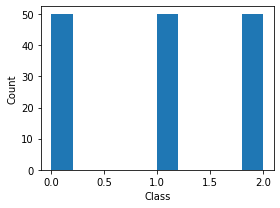

In [5]:
plt.figure(figsize=(4, 3))
plt.hist(visualization_set.target)
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()

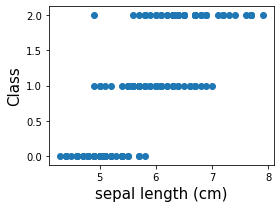

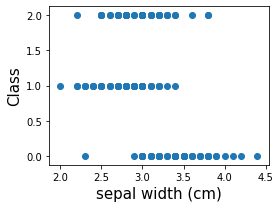

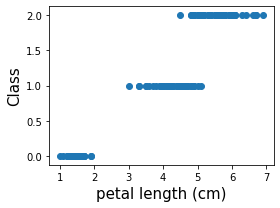

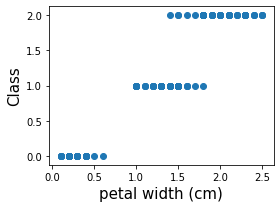

In [6]:
for index, feature_name in enumerate(visualization_set.feature_names):
    plt.figure(figsize=(4, 3))
    plt.scatter(visualization_set.data[:, index], visualization_set.target)
    plt.ylabel("Class", size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

In [7]:
# euclidian distance

def euclidian_dist(x_known,x_unknown):
    """
    This function calculates euclidian distance between each pairs of known and unknown points
    
    Argument:
    x_known -- array of training data with shape (num_examples, num_features)
    x_unknown -- array of test data with shape (num_examples, num_features)
    
    Returns:
    dists -- array of euclidian distances between each pairs of known and unknown points, 
    initialized as np.array of zeros with shape of (num_pred,num_data)
    
    """
    
    import scipy as sc
        
    dists = sc.spatial.distance.cdist(x_unknown, x_known, metric='euclidean')    
            
    return dists

In [8]:
x1 = np.array([[1,1], [3,3], [4, 4]])
x2 = np.array([[2,2],[3,3], [5, 5]])
d = euclidian_dist(x1, x2)
print(d)

[[1.41421356 1.41421356 2.82842712]
 [2.82842712 0.         1.41421356]
 [5.65685425 2.82842712 1.41421356]]


In [9]:
# k nearest labels

def k_nearest_labels(dists, y_known, k):
    """
    This function returns labels of k-nearest neighbours to each sample for unknown data.
    
    Argument:
    dists -- array of euclidian distances between each pairs of known and unknown points
    with shape (num_test_examples, num_train_examples)
    y_known -- array of train data labels
    k -- scalar, which means number of nearest neighbours
    
    Returns:
    knearest_labels -- array with shape (num_samples, k) which contains labels of k nearest neighbours for each sample 
    
    """
        
    num_pred = dists.shape[0]
    n_nearest = []
    
    for j in range(num_pred):
        dst = dists[j]        
        # count k closest points         
        closest_y = []        
        k_inds = np.argpartition(dst, range(k))[:k]        
        for ind in k_inds:
            closest_y.append(y_known[ind])        
        
        n_nearest.append(closest_y)
        
    return np.asarray(n_nearest) 

In [10]:
y = np.array([2, 3, 1])
knl = k_nearest_labels(d, y, 2)
print(knl)

[[2 3]
 [3 1]
 [1 3]]


In [11]:
# K-nearest Neighbours

class KNearest_Neighbours(object):
    """
    Parameters:
    -----------
    k: int
        The number of nearest neighbours
    """
    def __init__(self, k):
        
        self.k = k
        self.test_set_x = None
        self.train_set_x = None
        self.train_set_y = None

        
    def fit(self, train_set_x, train_set_y):        
        
        mean = train_set_x.ravel().mean()
        std = train_set_x.ravel().std()        
        train_set_x = (train_set_x - mean) / std
        
        self.train_set_x = train_set_x
        self.train_set_y = train_set_y        
                
        
    def predict(self, test_set_x):
        
        # Returns list of predicted labels for test set;
        # type(prediction) -> list, len(prediction) = len(test_set_y)
        prediction = []
        number_of_classes = 3
        
        mean = test_set_x.ravel().mean()
        std = test_set_x.ravel().std()        
        test_set_x = (test_set_x - mean) / std
        
        self.test_set_x = test_set_x
        
        m_test = test_set_x.shape[0]        
        
        dists = euclidian_dist(self.train_set_x, test_set_x)        
        
        n_nearest = k_nearest_labels(dists, self.train_set_y, self.k)        
        
        for j in range(m_test):
            neighbours = list(n_nearest[j])
            counts = np.zeros((number_of_classes, 1))
            for clas in range(number_of_classes):
                counts[clas] = neighbours.count(clas)
            decision = np.argmax(counts)
            
            prediction.append(decision)            
                
        return prediction

In [13]:
k = 4
model = KNearest_Neighbours(k)
model.fit(train_set_x, train_set_y)

In [14]:
y_predictions = model.predict(test_set_x)

In [16]:
actual = list(test_set_y)
accuracy = (y_predictions == test_set_y).mean()
print("Accuracy:", accuracy)

Accuracy: 0.98


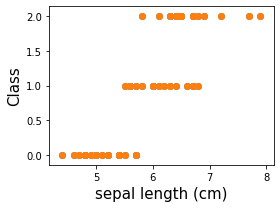

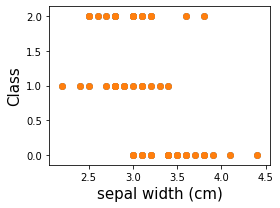

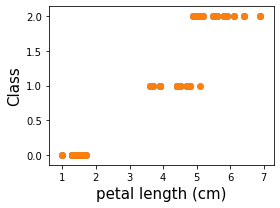

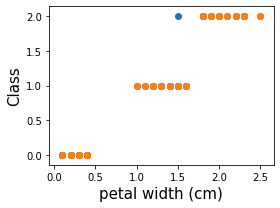

In [17]:
for index, feature_name in enumerate(visualization_set.feature_names):
    plt.figure(figsize=(4, 3))
    plt.scatter(test_set_x[:, index], test_set_y) # real labels
    plt.scatter(test_set_x[:, index], y_predictions) # predicted labels
    plt.ylabel("Class", size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

In [18]:
# Using sklearn facilities

from sklearn.neighbors import KNeighborsClassifier

k = 4
model = KNeighborsClassifier(k)
model.fit(train_set_x, train_set_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [19]:
y_predictions = model.predict(test_set_x)

In [20]:
actual = list(test_set_y)
accuracy = (y_predictions == test_set_y).mean()
print("Accuracy:", accuracy)

Accuracy: 0.98


In [21]:
def vanilla_pipeline(model):
    model.fit(train_set_x, train_set_y)
    y_predictions = model.predict(test_set_x)
    actual = list(test_set_y)
    accuracy = (y_predictions == test_set_y).mean()
    accuracy
    return accuracy

In [22]:
for i in range(1,12):
    model = KNeighborsClassifier(n_neighbors=i)
    print(vanilla_pipeline(model))

0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
1.0
